In [301]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import time


In [200]:
test = pd.read_csv(r"C:\Users\oscar\Downloads\archive\test.csv", sep = ";")

In [201]:
train = pd.read_csv(r"C:\Users\oscar\Downloads\archive\train.csv", sep=";")

In [202]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [204]:
# Concatenate the two datasets vertically (along rows)
df = pd.concat([train, test], ignore_index=True)

Seperate the rows into columns for the first row in the dataset

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


No missing value in the data

In [206]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,15164,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,15.816315,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,8.315680,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [207]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [208]:
# Drop duplicate rows and keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)

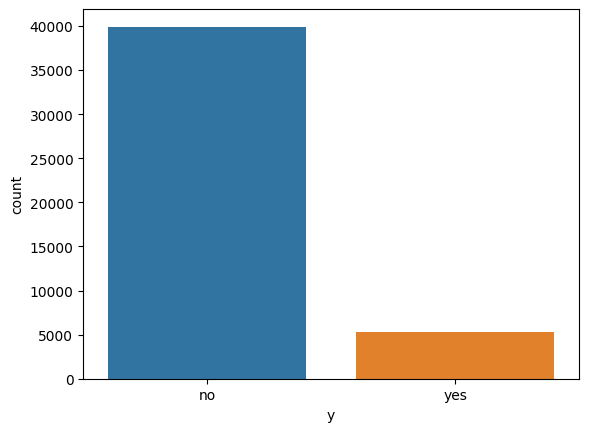

In [209]:
# Display the distribution of 'Survived'
sns.countplot(x='y', data=df)
plt.show()

The plot shows the imbalance distribution of the target

In [210]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## EDA for categorical columns

In [211]:
df.groupby('job').count()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [212]:
df.groupby(['y','job'])['age'].count().unstack()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


<Axes: xlabel='y'>

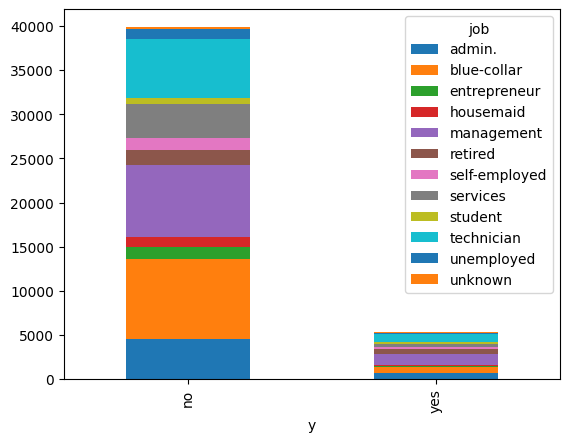

In [213]:
df.groupby(['y','job'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [214]:
#categorical: no housing gets higher subscribe rate
cross_tab = pd.crosstab(df['y'], df['job'], margins=True, margins_name='Total')

# Calculate percentages
percentage_housing = (cross_tab.div(cross_tab['Total'], axis=0) * 100).round(2)
percentage_housing

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,Total
y,,,,,,,,,,,,,
no,11.37,22.60,3.42,2.83,20.43,4.38,3.49,9.48,1.68,16.93,2.76,0.64,100.0
yes,11.93,13.39,2.33,2.06,24.60,9.76,3.54,6.98,5.09,15.88,3.82,0.64,100.0
Total,11.44,21.53,3.29,2.74,20.92,5.01,3.49,9.19,2.07,16.80,2.88,0.64,100.0


In [215]:
df.groupby('marital').count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
divorced,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
married,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214
single,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790


<Axes: xlabel='y'>

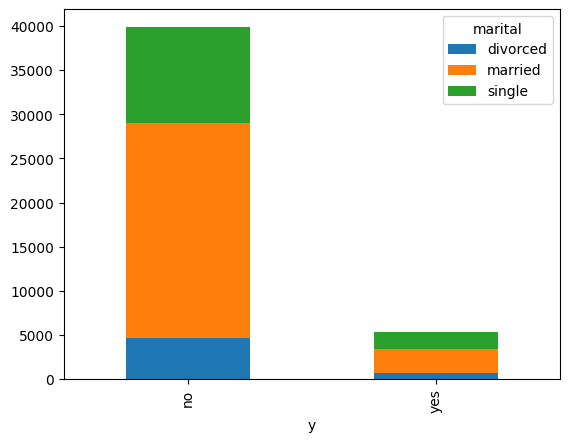

In [216]:
df.groupby(['y','marital'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [217]:
df.groupby('education').count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


<Axes: xlabel='y'>

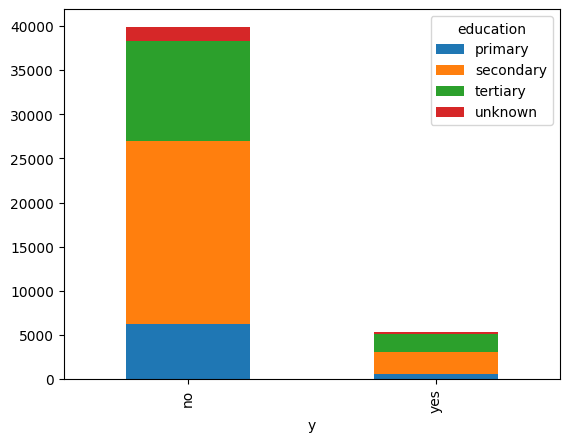

In [218]:
df.groupby(['y','education'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [219]:
df.groupby('default').count()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
default,,,,,,,,,,,,,,,,
no,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396
yes,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815


<Axes: xlabel='y'>

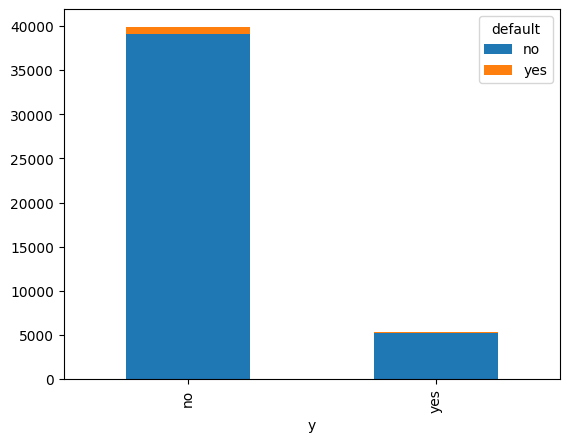

In [220]:
df.groupby(['y','default'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [221]:
df.groupby('housing').count()

,age,job,marital,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
housing,,,,,,,,,,,,,,,,
no,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081
yes,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130


<Axes: xlabel='y'>

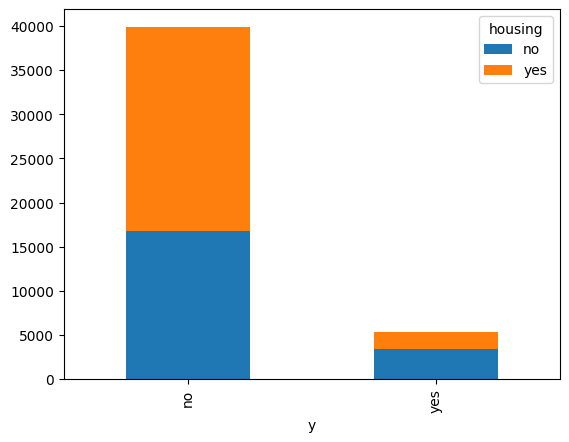

In [222]:
df.groupby(['y','housing'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [223]:
df.groupby('loan').count()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
loan,,,,,,,,,,,,,,,,
no,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967
yes,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244


<Axes: xlabel='y'>

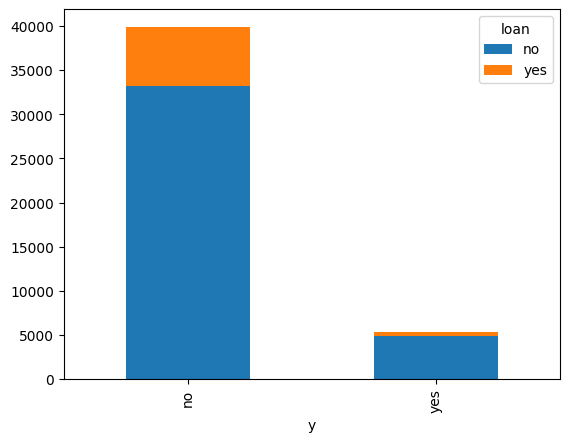

In [224]:
df.groupby(['y','loan'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [225]:
df.groupby('contact').count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
contact,,,,,,,,,,,,,,,,
cellular,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285
telephone,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906
unknown,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020


<Axes: xlabel='y'>

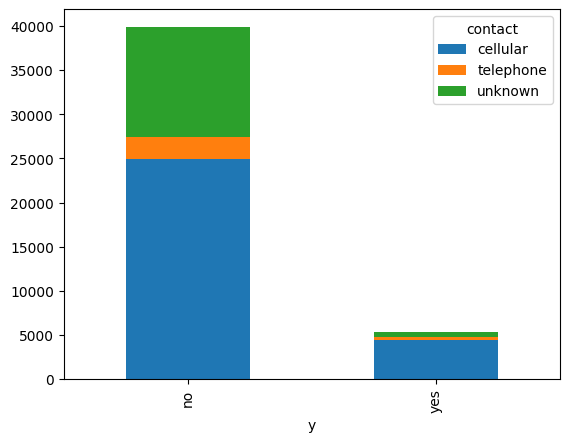

In [226]:
df.groupby(['y','contact'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [227]:
df.groupby('poutcome').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
poutcome,,,,,,,,,,,,,,,,
failure,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
other,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840
success,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
unknown,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959


<Axes: xlabel='y'>

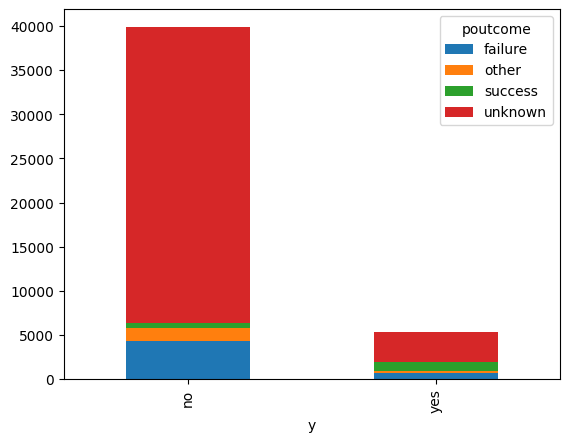

In [228]:
df.groupby(['y','poutcome'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [229]:
df.groupby('month').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
month,,,,,,,,,,,,,,,,
apr,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932
aug,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247
dec,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
feb,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
jan,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
jul,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895
jun,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
mar,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
may,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766


<Axes: xlabel='y'>

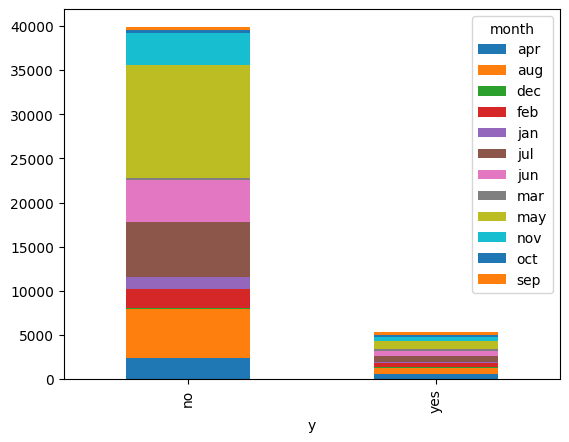

In [230]:
df.groupby(['y','month'])['age'].count().unstack().plot(kind='bar', stacked=True)

The EDA shows that 'job', 'housing', 'contact', 'poutcome' and 'month' are good predictive variables for the target as the data is have different pattern according to the value target. </br>
'month' columns has the potential for further grouping base on season </br>

### Data Cleaning for cat column

In [231]:
# remove all the unknow value in the 'job' columns
df_t1 = df.drop(df[df['job'] == 'unknown'].index)

## EDA for numeric columns

In [232]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44923 non-null  int64 
 1   job        44923 non-null  object
 2   marital    44923 non-null  object
 3   education  44923 non-null  object
 4   default    44923 non-null  object
 5   balance    44923 non-null  int64 
 6   housing    44923 non-null  object
 7   loan       44923 non-null  object
 8   contact    44923 non-null  object
 9   day        44923 non-null  int64 
 10  month      44923 non-null  object
 11  duration   44923 non-null  int64 
 12  campaign   44923 non-null  int64 
 13  pdays      44923 non-null  int64 
 14  previous   44923 non-null  int64 
 15  poutcome   44923 non-null  object
 16  y          44923 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


EDA for numeric columns

In [233]:
df_t1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

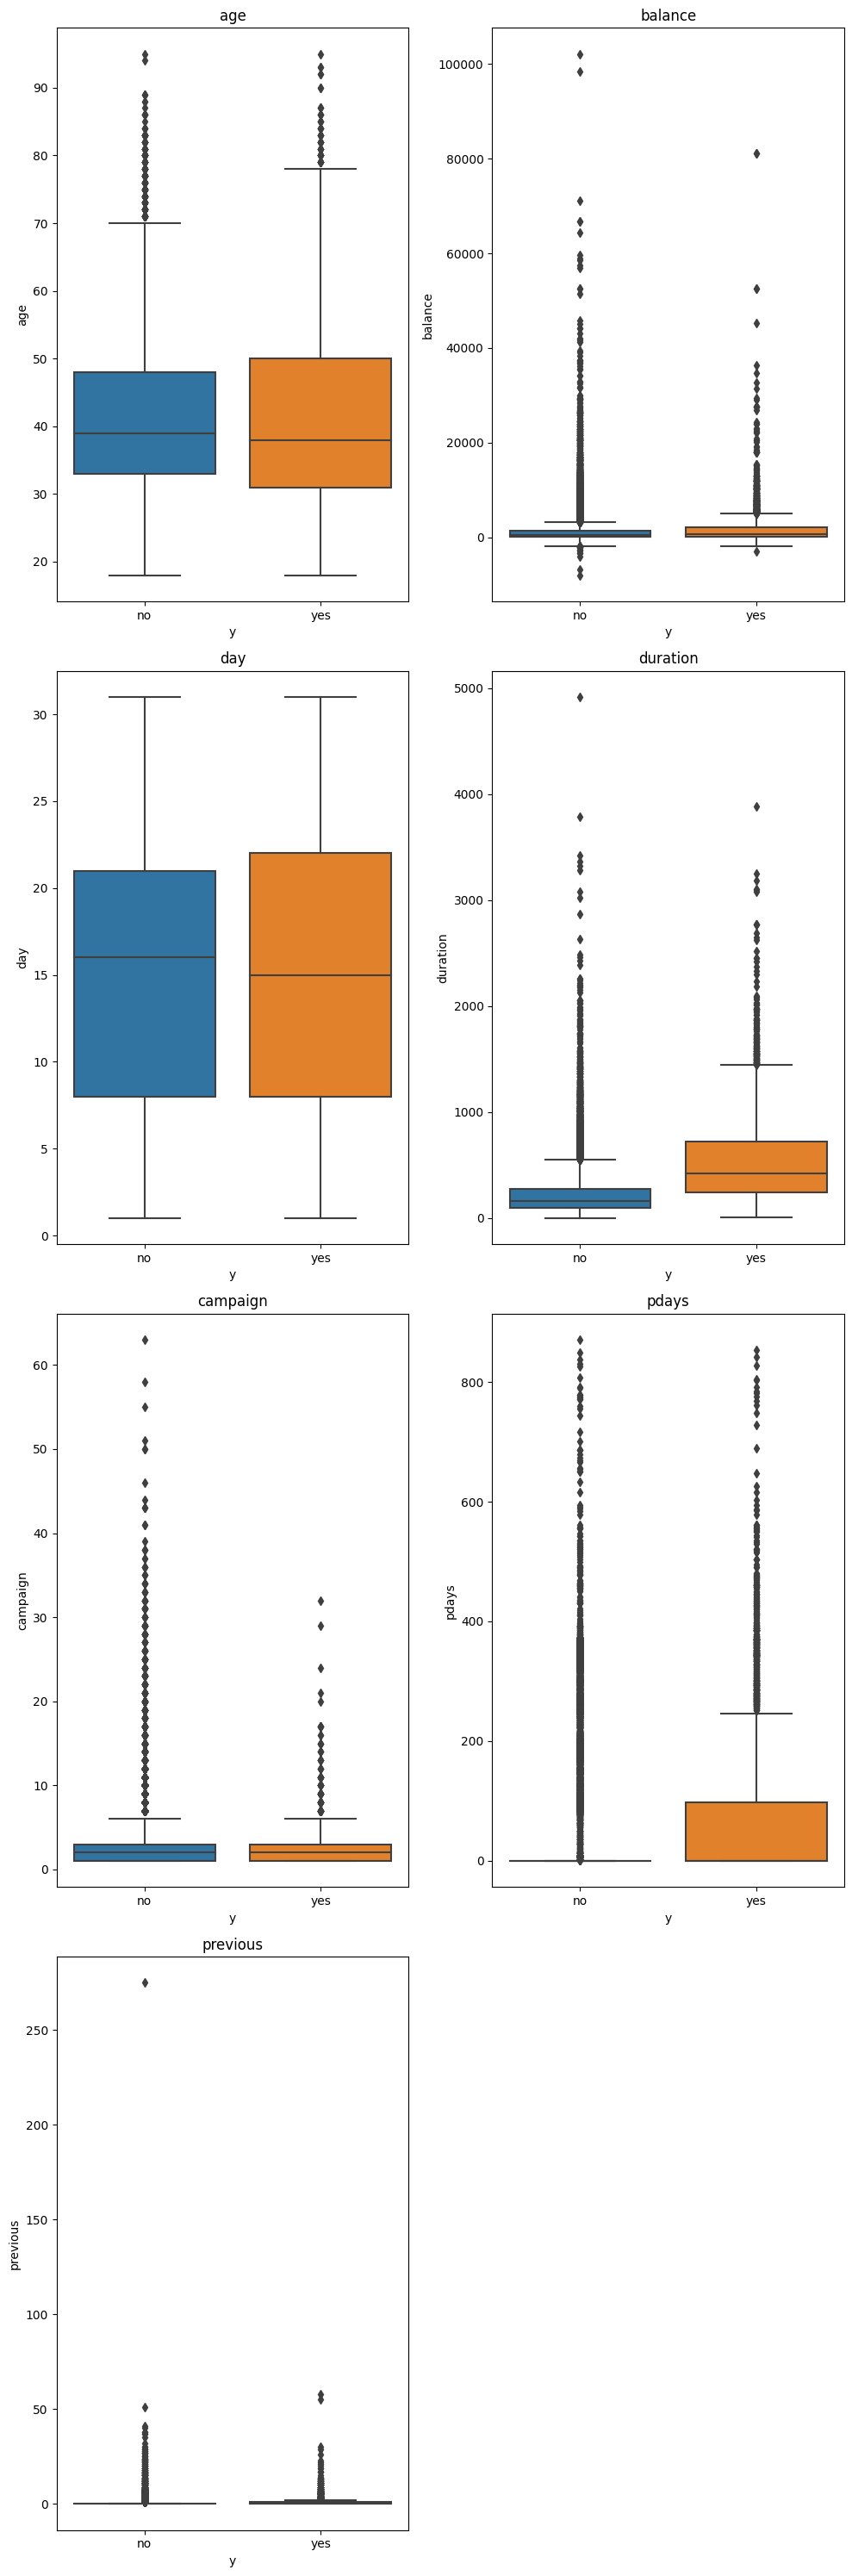

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10,30))

sns.boxplot(x='y', y='age', data=df_t1, ax=ax1)
ax1.set_title('age')

sns.boxplot(x='y', y='balance', data=df_t1, ax=ax2)
ax2.set_title('balance')

sns.boxplot(x='y', y='day', data=df_t1, ax=ax3)
ax3.set_title('day')

sns.boxplot(x='y', y='duration', data=df_t1, ax=ax4)
ax4.set_title('duration')

sns.boxplot(x='y', y='campaign', data=df_t1, ax=ax5)
ax5.set_title('campaign')

sns.boxplot(x='y', y='pdays', data=df_t1, ax=ax6)
ax6.set_title('pdays')

sns.boxplot(x='y', y='previous', data=df_t1, ax=ax7)
ax7.set_title('previous')

# Remove the unused subplot
fig.delaxes(ax8)

plt.tight_layout()
plt.show()


'duration' and 'pdays' are the good predictive variables as the mean of these variables varies according to the value of y

### Data cleaning for numric columns

In [235]:
# remove outliers of durration column
df_t1 = df_t1.drop(df_t1[df_t1['duration'] > 3000].index)

In [236]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44909 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44909 non-null  int64 
 1   job        44909 non-null  object
 2   marital    44909 non-null  object
 3   education  44909 non-null  object
 4   default    44909 non-null  object
 5   balance    44909 non-null  int64 
 6   housing    44909 non-null  object
 7   loan       44909 non-null  object
 8   contact    44909 non-null  object
 9   day        44909 non-null  int64 
 10  month      44909 non-null  object
 11  duration   44909 non-null  int64 
 12  campaign   44909 non-null  int64 
 13  pdays      44909 non-null  int64 
 14  previous   44909 non-null  int64 
 15  poutcome   44909 non-null  object
 16  y          44909 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [237]:
df_clean = df_t1

### Hypothesis:
1. 'job', 'housing', 'contact', 'poutcome' and 'month'good predictive variables for y </br>
2. 'month' column can be performed grouping for better prediction </br>
3. For numeric columns, 'duration' and 'pdays' are good predictive variables </br>

### Feature Engineering

In [238]:
print(df_clean['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [239]:
# create function for grouping month to quarter

def q_cat(x):
    if x in ['jan', 'feb', 'mar']:
        return 'Q1'
    elif x in ['apr', 'may', 'jun']:
        return 'Q2'
    elif x in ['jul', 'aug', 'sep']:
        return 'Q3'
    else:
        return 'Q4'

Apply grouping for 'month' column

In [240]:
df_clean['quarter'] = df_clean['month'].apply(q_cat)

In [241]:
df_clean.groupby(['y','quarter'])['age'].count().unstack()

quarter,Q1,Q2,Q3,Q4
y,,,,
no,3674,19871,12040,4075
yes,821,2035,1575,818


<Axes: xlabel='y'>

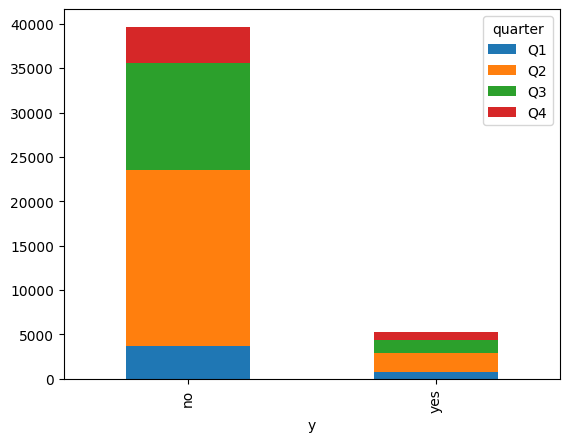

In [242]:
df_clean.groupby(['y','quarter'])['age'].count().unstack().plot(kind='bar', stacked=True)

Change the 'yes' and 'no' value to booleans for all the relevant columns

In [243]:
def y_n(x):
    if x == 'yes':
        return True
    else:
        return False

In [244]:
df_clean['y'] = df_clean['y'].apply(y_n)

In [245]:
df_clean['housing'] = df_clean['housing'].apply(y_n)

In [327]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44909 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44909 non-null  int64 
 1   job        44909 non-null  object
 2   marital    44909 non-null  object
 3   education  44909 non-null  object
 4   default    44909 non-null  object
 5   balance    44909 non-null  int64 
 6   housing    44909 non-null  bool  
 7   loan       44909 non-null  object
 8   contact    44909 non-null  object
 9   day        44909 non-null  int64 
 10  month      44909 non-null  object
 11  duration   44909 non-null  int64 
 12  campaign   44909 non-null  int64 
 13  pdays      44909 non-null  int64 
 14  previous   44909 non-null  int64 
 15  poutcome   44909 non-null  object
 16  y          44909 non-null  bool  
 17  quarter    44909 non-null  object
dtypes: bool(2), int64(7), object(9)
memory usage: 5.9+ MB


In [247]:
df_clean.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quarter
count,44909.000000,44909,44909,44909,44909,44909.000000,44909,44909,44909,44909.000000,44909,44909.000000,44909.000000,44909.000000,44909.000000,44909,44909,44909
unique,NaN,11,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2,4
top,NaN,blue-collar,married,secondary,no,NaN,True,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,False,Q2
freq,NaN,9728,27001,23123,44096,NaN,25097,37674,29149,NaN,13732,NaN,NaN,NaN,NaN,36690,39660,21906
mean,40.892494,NaN,NaN,NaN,NaN,1359.794807,NaN,NaN,NaN,15.813356,NaN,257.311229,2.760583,40.333897,0.582177,NaN,NaN,NaN
std,10.604386,NaN,NaN,NaN,NaN,3045.414886,NaN,NaN,NaN,8.320046,NaN,251.513459,3.093247,100.268116,2.309414,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,447.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1422.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN


### Create Pipeline

In [291]:
# set up knn and LR model
knn = KNeighborsClassifier()
log_reg = LogisticRegression()


In [300]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg}

In [299]:
# Create dictionary to store the results of each model
results = {}

Explain your pre-processing approach and justify the transformations you have made: </br>
- Used one hot encoding for all the categorical columns and standard scaler for all the numeric columns
- Used Smote in the pipeline since the data is imbalance
- Build a loop to run the pipeline models for KNN and Logistic Regression
- Print out all the performance metrics and cross validation result

In [338]:
X = df_clean[['job', 'contact', 'poutcome', 'quarter', 'duration', 'pdays', 'housing']]
y = df_clean['y']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)]) 

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combine preprocessing and SMOTE in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=1234))  # Include SMOTE in the pipeline
])

# Transform the training data
X_train_transformed, y_train_transformed = pipeline['smote'].fit_resample(pipeline['preprocessor'].fit_transform(X_train), y_train)

# Transform the test data using the same preprocessing
X_test_preprocessed = pipeline['preprocessor'].fit_transform(X_test)

# looping for knn and lr
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline_2 = Pipeline(steps=[('classifier', clf)])
    
    # Fit the model
    pipeline_2.fit(X_train_transformed, y_train_transformed)
    
    # Make predictions
    y_pred = pipeline_2.predict(X_test_preprocessed)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(pipeline_2, X_train_transformed, y_train_transformed, cv=5, scoring='accuracy')
    rounded_scores = np.round(scores, 6)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time,
        'Cross Validation': rounded_scores
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)


                    Precision    Recall  F1-Score  Accuracy   Time (s)  \
K-Nearest Neighbors   0.35779  0.738318  0.482001  0.810955  29.798984   
Logistic Regression  0.395793  0.773832  0.523719  0.832331   0.586302   

                                                      Cross Validation  
K-Nearest Neighbors  [0.845827, 0.852902, 0.850382, 0.850382, 0.847...  
Logistic Regression  [0.792047, 0.798567, 0.795259, 0.801323, 0.794...  


#### Performance Comparison: </br>
The KNN model has lower precision and recall. This means the model is not good at predicting whether the client subscribed a term deposit, and it may wrongly classify some client as no term deposit (false negative). The F1 score and accuracy rate are low and the processing time of it is also long when compare to LR, this is not an efficient model when comparing to LR.

The Logistic Regression (LR) has better precision, recall, F1 score, and accuracy. Besides, it is the faster model. Therefore, LR is a more efficient model.

In [339]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

Build the following ensemble model:

Random Forest

AdaBoost

Bagging Classifier

Voting Classifier

In [341]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

knn = KNeighborsClassifier()
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [343]:
classifiers_2 = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [344]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 10]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers_2.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline_3 = Pipeline(steps=[('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline_3, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train_transformed, y_train_transformed)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_preprocessed)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    scores = cross_val_score(pipeline_3, X_train_transformed, y_train_transformed, cv=5, scoring='accuracy')
    rounded_scores = np.round(scores, 6)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time,
        'Cross Validation': rounded_scores
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                                           Best Params  \
K-Nearest Neighbors                     {'classifier__n_neighbors': 7}   
Logistic Regression                             {'classifier__C': 0.1}   
Decision Tree                            {'classifier__max_depth': 20}   
Random Forest        {'classifier__max_depth': 20, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'soft'}   

                    Precision    Recall  F1-Score     Time (s)  \
K-Nearest Neighbors  0.353304  0.749533   0.48024   292.242429   
Logistic Regression  0.395793  0.773832  0.523719     4.982057   
Decision Tree          0.3127  0.731776  0.438165    86.907315   
Random Forest         0.35478  0.731776  0.477876  4989.213033   
AdaBoost             0.370497  0.807477  0.507937    75.561578   
Bagging    

According to cross validation, there is no overfitting for all the models.

### Performance Comparison </br>

KNN: Overall decent metrics performance among all the model expect LR but with a relatively long runnning time

Logistic Regression: Best precision, second highest recall, Highest F1 score, and it's the fastest models. Therefore, it is the best model.

Decision Tree: Worst performance in the most of the metrics (Precision, Recall and F1 score), and it is efficient among all the models expect LR

Random Forest: The most inefficient model of all (4989 sec), and has moderate metrics performance among all the models.

AdaBoost: Perform well on all metrics and it is a efficient model among all the models expect for LR.

Bagging: Worst metrics performance among all the models, and very inefficient.

Voting:  Decent metrics for Recall and F1 score across the board, but still inefficient.

### For this case, I think Precision should be the metric to evluate the model

#### Why did the ensemble models perform the way they did? </br>

Random Forest
Random Forest is an algorithm that combines multiple decision trees to make predictions. It works by creating a "forest" of trees, where each tree independently predicts an outcome. The final prediction is then determined by combining the predictions from all the trees. Since the imbalance data and the complexity of the model resulted in an extremly long processing time.</br>

AdaBoost
Adaboost is an ensemble learning algorithm that combines multiple weak classifiers to create a strong classifier. Since it 

Bagging Classifier

Voting Classifier